In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score
from sklearn.multiclass import OneVsOneClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [3]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


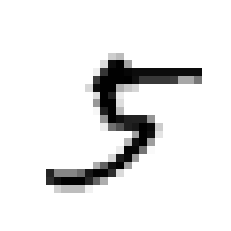

In [4]:
some_digit = X[36011]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = 'nearest')
plt.axis("off")
plt.show()

In [5]:
y[36002]

'6'

In [6]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000].astype(int), y[60000:].astype(int)
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [7]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [8]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [9]:
sgd_clf.predict([some_digit])

array([ True])

In [10]:
cross_val_score(sgd_clf, X_train, y_train_5,cv=3,scoring="accuracy")

array([0.96695, 0.95705, 0.96725])

In [11]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5,cv=3)
confusion_matrix(y_train_5, y_train_pred)

array([[53455,  1124],
       [ 1051,  4370]])

In [12]:
precision_score(y_train_5, y_train_pred)

0.7954131780123771

In [13]:
recall_score(y_train_5, y_train_pred)

0.8061243313041874

In [14]:
f1_score(y_train_5, y_train_pred)

0.8007329363261566

In [15]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [16]:
def plot_precision_recall_vs_thresholds(precisions, recalls, thresholds):
    plt.figure(figsize=(20,10))
    plt.plot(thresholds, precisions[:-1],"b--", label = "Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="center left")
    plt.ylim([0,1])
    plt.xlim([-60000,60000])

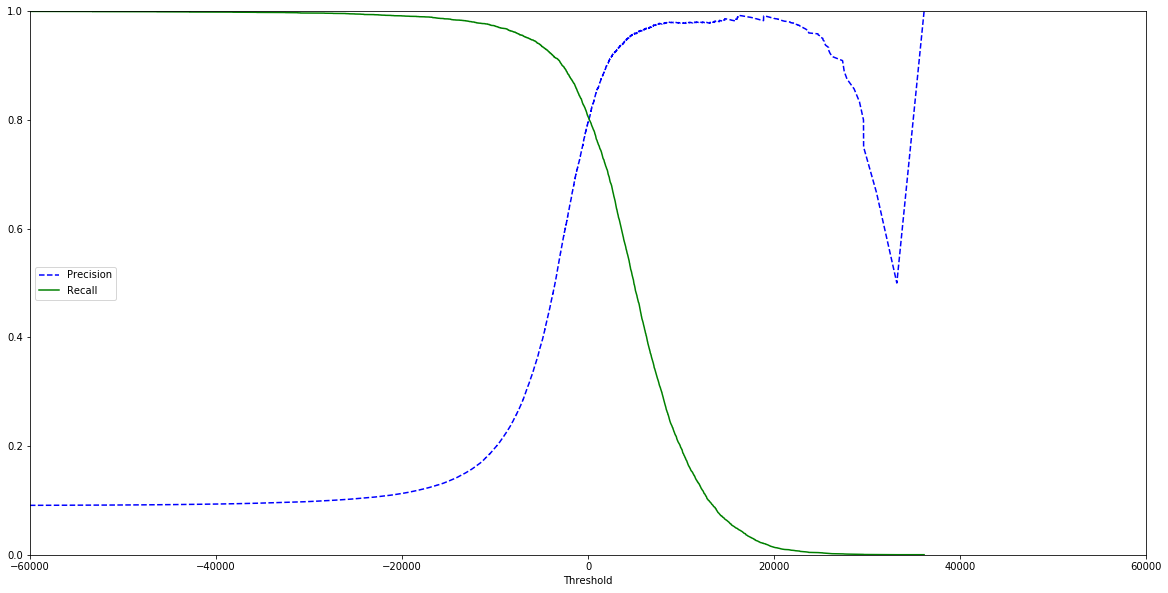

In [17]:
plot_precision_recall_vs_thresholds(precisions, recalls, thresholds)
plt.show()

In [18]:
y_train_pred_90 = (y_scores > 5000)
precision_score(y_train_5,y_train_pred_90)

0.9589138978206503

In [19]:
recall_score(y_train_5,y_train_pred_90)

0.4951116030252721

In [20]:
fpr, tpr, thresholds =roc_curve(y_train_5,y_scores)

In [21]:
def plot_roc_curve(fpr,tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label = label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])

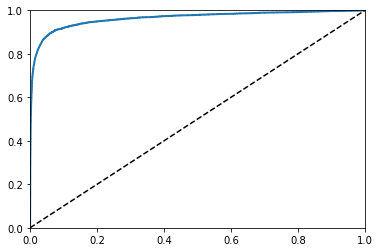

In [22]:
plot_roc_curve(fpr,tpr)

In [23]:
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method='predict_proba')

/home/kacper/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/kacper/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/kacper/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [24]:
y_scores_forest = y_probas_forest[:, 1]
fpr_forest,tpr_forest,thresholds_forest = roc_curve(y_train_5, y_scores_forest)

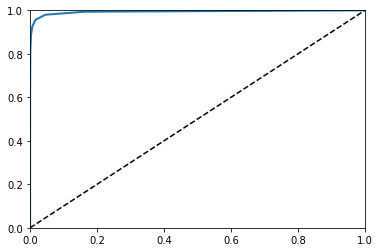

In [25]:
plot_roc_curve(fpr_forest,tpr_forest)

In [26]:
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [27]:
sgd_clf.predict([some_digit])

array([5])

In [28]:
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

array([5])

In [29]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

/home/kacper/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([5])

In [30]:
cross_val_score(sgd_clf, X_train, y_train,cv=3, scoring="accuracy")

array([0.84993001, 0.87359368, 0.84927739])

In [32]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.90171966, 0.89834492, 0.9013352 ])

In [34]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train,y_train_pred)
conf_mx

array([[5584,    0,   18,   10,   10,   46,   33,    6,  215,    1],
       [   1, 6414,   43,   26,    3,   42,    5,    6,  188,   14],
       [  26,   25, 5235,   88,   77,   20,   65,   37,  376,    9],
       [  25,   21,  105, 5233,    1,  205,   24,   43,  407,   67],
       [   6,   15,   44,    9, 5246,   10,   34,   21,  308,  149],
       [  31,   15,   26,  162,   54, 4469,   79,   16,  500,   69],
       [  31,   15,   46,    1,   37,   86, 5562,    7,  132,    1],
       [  23,   14,   49,   24,   47,   11,    2, 5711,  166,  218],
       [  12,   65,   38,   93,    1,  121,   29,    9, 5443,   40],
       [  21,   22,   28,   61,  131,   34,    1,  171,  349, 5131]])

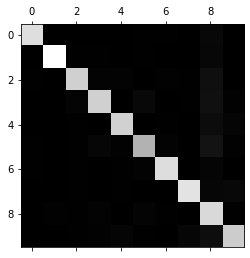

In [36]:
plt.matshow(conf_mx,cmap=plt.cm.gray)
plt.show()

In [37]:
row_sums = conf_mx.sum(axis=1,keepdims=True)
norm_conf_mx = conf_mx / row_sums

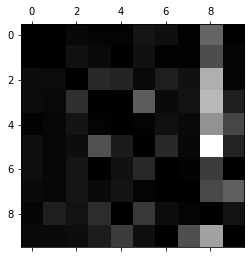

In [40]:
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx,cmap=plt.cm.gray)
plt.show()

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
y_train_large = (y_train >=7)
y_train_odd = (y_train % 2 ==1)
y_multilabel = np.c_[y_train_large,y_train_odd]

In [47]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [48]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [49]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel,cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.977581513158869

In [54]:
noise = np.random.randint(0,100, (len(X_train),784))
X_train_mod = X_train + noise
noise = np.random.randint(0,100,(len(X_test),784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [57]:
knn_clf.fit(X_train_mod,y_train_mod)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

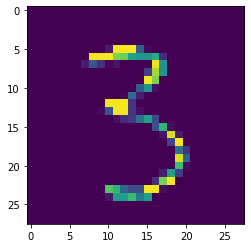

In [58]:
clean_digit = knn_clf.predict([X_test_mod[5000]])
plt.imshow(clean_digit.reshape(28,28))
plt.show()